  -                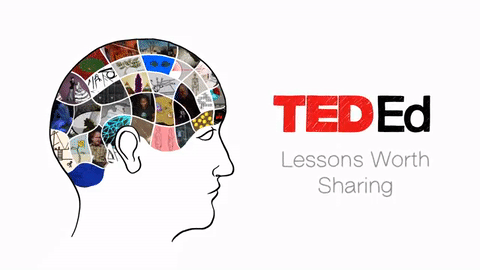

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Ted talks have been influential in propagating great ideas and talks through media communication and has been source of good worldover.Hence,I will try to provide a descriptive and inferential analysis of the talks in this.

# Loading Packages

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(zoo)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
df <- read.csv('../input/ted-talks/ted_main.csv')
head(df)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
2,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', '

# Metadata

**name**: The official name of the TED Talk. Includes the title and the speaker.

**title**: The title of the talk

**description**: A blurb of what the talk is about.

**main_speaker**: The first named speaker of the talk.

**speaker_occupation**: The occupation of the main speaker.

**num_speaker**: The number of speakers in the talk.

**duration**: The duration of the talk in seconds.

**event**: The TED/TEDx event where the talk took place.

**film_date**: The Unix timestamp of the filming.

**published_date**: The Unix timestamp for the publication of the talk on TED.com

**comments**: The number of first level comments made on the talk.

**tags**: The themes associated with the talk.

**languages**: The number of languages in which the talk is available.

**ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)

**related_talks**: A list of dictionaries of recommended talks to watch next.

**url**: The URL of the talk.

**views**: The number of views on the talk.

Related talks and URl of the video seems unnecessary for us so we can remove it 

# Cleaning the Data

In [3]:
df <- df[, !(colnames(df) %in% c("related_talks","url",'ratings'))]

In [4]:
colnames(df)

[1] "comments"           "description"        "duration"          
 [4] "event"              "film_date"          "languages"         
 [7] "main_speaker"       "name"               "num_speaker"       
[10] "published_date"     "speaker_occupation" "tags"              
[13] "title"              "views"

Order of the columns are not intuitive.So let's rearrange all the columns for better analysis

In [5]:
df_clean <- df[,c(8,7,2,13,11,9,3,4,5,10,1,6,14)]
head(df_clean)

,name,main_speaker,description,title,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,views
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,Ken Robinson: Do schools kill creativity?,Ken Robinson,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,Do schools kill creativity?,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,60,47227110
2,Al Gore: Averting the climate crisis,Al Gore,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",Averting the climate crisis,Climate advocate,1,977,TED2006,1140825600,1151367060,265,43,3200520
3,David Pogue: Simplicity sells,David Pogue,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",Simplicity sells,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,26,1636292
4,Majora Carter: Greening the ghetto,Majora Carter,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",Greening the ghetto,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,35,1697550
5,Hans Rosling: The best stats you've ever seen,Hans Rosling,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",The best stats you've ever seen,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,48,12005869
6,Tony Robbins: Why we do what we do,Tony Robbins,"Tony Robbins discusses the ""invisible forces"" that motivate everyone's actions -- and high-fives Al Gore in the front row.",Why we do what we do,Life coach; expert in leadership psychology,1,1305,TED2006,1138838400,1151440680,672,36,20685401


**Published date and Film date are in Unix time stamp format. We change them first for easier data analysis**

In [6]:
df_clean$published_date <- as_datetime(df_clean$published_date)
df_clean$film_date <- as_datetime(df_clean$film_date)

In [7]:
head(df_clean)

,name,main_speaker,description,title,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,views
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dttm>,<dttm>,<int>,<int>,<int>
1,Ken Robinson: Do schools kill creativity?,Ken Robinson,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,Do schools kill creativity?,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27 00:11:00,4553,60,47227110
2,Al Gore: Averting the climate crisis,Al Gore,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",Averting the climate crisis,Climate advocate,1,977,TED2006,2006-02-25,2006-06-27 00:11:00,265,43,3200520
3,David Pogue: Simplicity sells,David Pogue,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",Simplicity sells,Technology columnist,1,1286,TED2006,2006-02-24,2006-06-27 00:11:00,124,26,1636292
4,Majora Carter: Greening the ghetto,Majora Carter,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",Greening the ghetto,Activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27 00:11:00,200,35,1697550
5,Hans Rosling: The best stats you've ever seen,Hans Rosling,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",The best stats you've ever seen,Global health expert; data visionary,1,1190,TED2006,2006-02-22,2006-06-27 20:38:00,593,48,12005869
6,Tony Robbins: Why we do what we do,Tony Robbins,"Tony Robbins discusses the ""invisible forces"" that motivate everyone's actions -- and high-fives Al Gore in the front row.",Why we do what we do,Life coach; expert in leadership psychology,1,1305,TED2006,2006-02-02,2006-06-27 20:38:00,672,36,20685401


In [ ]:
write.csv(df_clean,'ted_mod.csv',row.names=F)

In [ ]:
write.csv(df_clean,'occupation.csv',row.names=F)

# Data Analysis

In [8]:
most_views_15 <- df_clean %>% select(c(name,main_speaker,film_date,views)) %>% arrange(desc(views))

most_views_15 <- most_views_15[1:15,]

most_views_15

,name,main_speaker,film_date,views
,<chr>,<chr>,<dttm>,<int>
1,Ken Robinson: Do schools kill creativity?,Ken Robinson,2006-02-25,47227110
2,Amy Cuddy: Your body language may shape who you are,Amy Cuddy,2012-06-26,43155405
3,Simon Sinek: How great leaders inspire action,Simon Sinek,2009-09-17,34309432
4,Brené Brown: The power of vulnerability,Brené Brown,2010-06-06,31168150
5,Mary Roach: 10 things you didn't know about orgasm,Mary Roach,2009-02-06,22270883
6,Julian Treasure: How to speak so that people want to listen,Julian Treasure,2013-06-10,21594632
7,Jill Bolte Taylor: My stroke of insight,Jill Bolte Taylor,2008-02-27,21190883
8,Tony Robbins: Why we do what we do,Tony Robbins,2006-02-02,20685401
9,James Veitch: This is what happens when you reply to spam email,James Veitch,2015-12-08,20475972


# Most watched Speakers

Ken Robinson is the most watched TED speaker with almost 47 million views.It shows his tremendous vidoes creating large interest amonng TED talk listeners

Cursory look into Wikipedia shows that Sir Ken Robinson was a British author, speaker and international advisor on education in the arts to government, non-profits, education and arts bodies. He was director of the Arts in Schools Project and Professor of Arts Education at the University of Warwick, and Professor Emeritus after leaving the university.

Some of his important idea is that there are three things about **intelligence**. One, **it's diverse**. We think about the world in all the ways that we experience it. We think **visually**; we think in **sound**; We think in **aesthetically**; we think in **abstract terms**; we think in **movement**.

In [ ]:
ggplot(most_views_15, aes(x = reorder(main_speaker, -views), y = views)) +
         geom_bar(stat = "identity",fill = 'steelblue')+geom_text(aes(label=views), vjust=1.6, color="white", size=3.5)+
        theme_minimal()+
        ggtitle("Top 15 Most Watched Speakers") +
         xlab("Speaker") + ylab("Views")

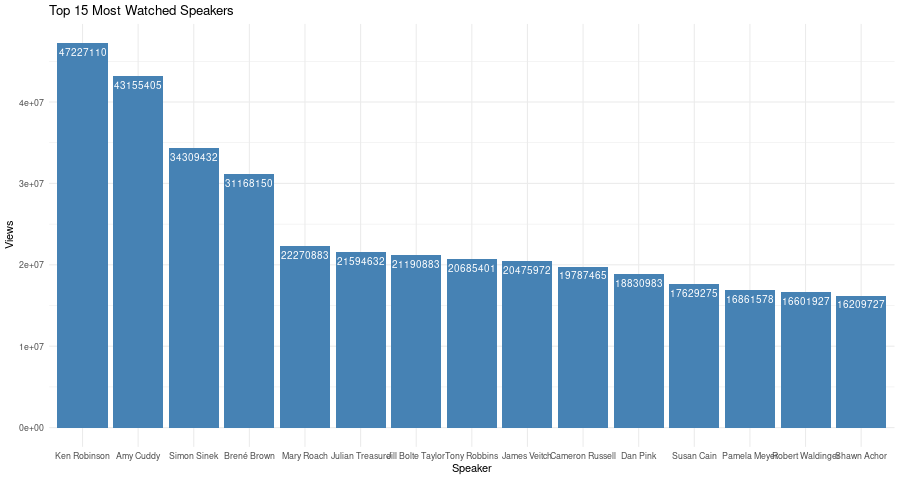

# Distribution of Views and comments

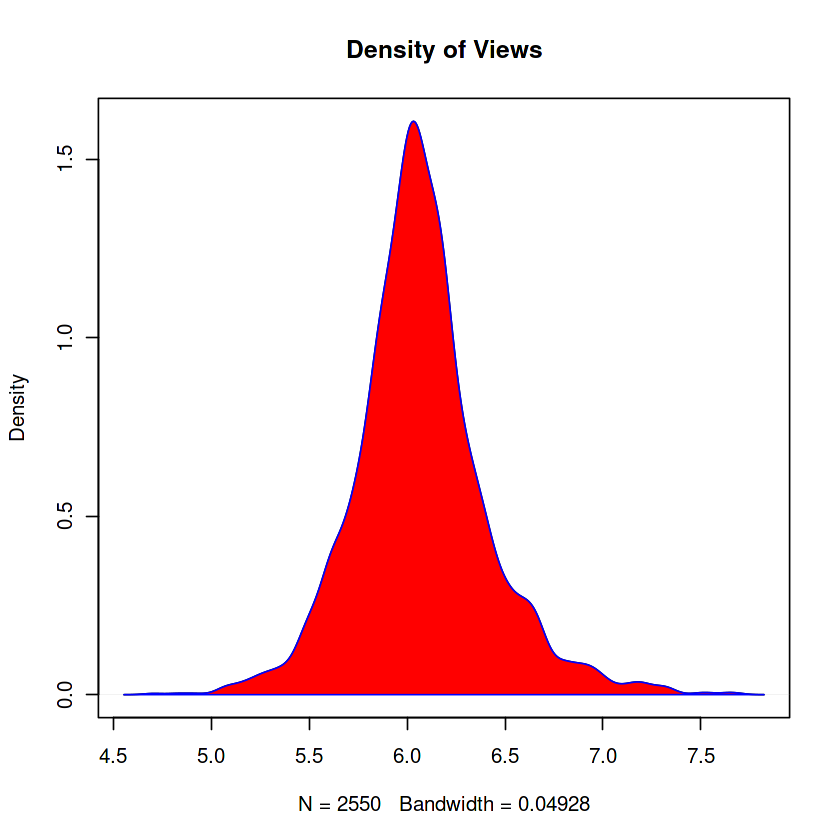

In [9]:
d <- density(log10(df_clean$views))
plot(d, main="Density of Views")
polygon(d, col="red", border="blue")

In [10]:
summary(df_clean$views)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   50443   755793  1124524  1698297  1700760 47227110 

* The average number of views on TED Talks in 1.6 million. 
* median number of views is 1.12 million. 

This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than 4 million. We will consider this as the cutoff point when costructing box plots in the later sections.

Although the TED website gives us access to all the comments posted publicly, this dataset only gives us the number of comments. We will therefore have to restrict our analysis to this feature only. You could try performing textual analysis by scraping the website for comments.

In [11]:
summary(df_clean$comments)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    63.0   118.0   191.6   221.8  6404.0 

**On average, there are 191.5 comments on every TED Talk.**

Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.

There is a huge standard deviation associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.

**The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402.. The minimum number, though, may be as a result of the talk being posted extremely recently.**

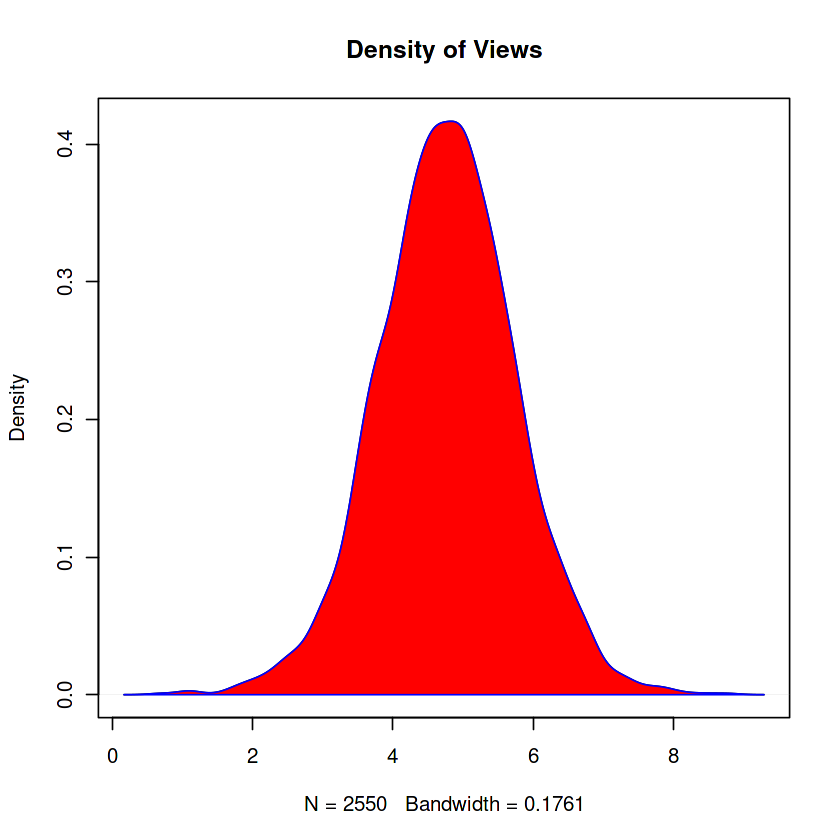

In [12]:
d <- density(log(df_clean$comments))
plot(d, main="Density of Views")
polygon(d, col="red", border="blue")

**There seems to be ample correlation between Commnents and Views based on Scatter plot**

In [ ]:
ggplot(df_clean, aes(x=views, y=comments)) + 
    geom_point(
        color="orange",
        fill="#69b3a2",
        shape=21,
        alpha=0.5,
        size=6,
        stroke = 2
        )

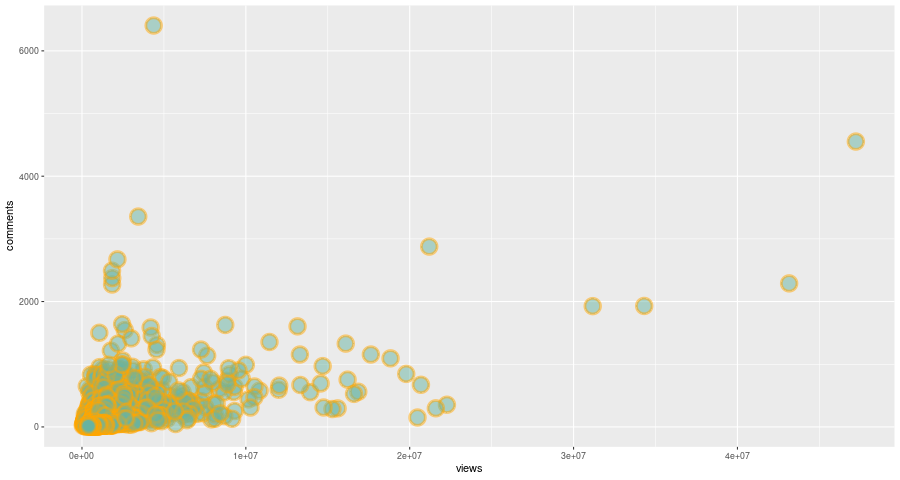

**Calculating Correlation between comments and views**

In [14]:
res <- cor.test(df_clean$views, df_clean$comments, 
                    method = "pearson")
res


	Pearson's product-moment correlation

data:  df_clean$views and df_clean$comments
t = 31.626, df = 2548, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5024779 0.5582501
sample estimates:
      cor 
0.5309387 


**As the scatterplot and the correlation matrix show, the pearson coefficient is slightly more than 0.5. This suggests a medium to strong correlation between the two quantities.**

In [15]:
most_comments_15 <- df_clean %>% select(c(name,main_speaker,film_date,views,comments)) %>% arrange(desc(comments))

most_comments_15 <- most_comments_15[1:15,]

most_comments_15

,name,main_speaker,film_date,views,comments
,<chr>,<chr>,<dttm>,<int>,<int>
1,Richard Dawkins: Militant atheism,Richard Dawkins,2002-02-02,4374792,6404
2,Ken Robinson: Do schools kill creativity?,Ken Robinson,2006-02-25,47227110,4553
3,Sam Harris: Science can answer moral questions,Sam Harris,2010-02-11,3433437,3356
4,Jill Bolte Taylor: My stroke of insight,Jill Bolte Taylor,2008-02-27,21190883,2877
5,David Chalmers: How do you explain consciousness?,David Chalmers,2014-03-18,2162764,2673
6,Janet Echelman: Taking imagination seriously,Janet Echelman,2011-03-03,1832930,2492
7,Lesley Hazleton: On reading the Koran,Lesley Hazleton,2010-10-10,1847256,2374
8,Amy Cuddy: Your body language may shape who you are,Amy Cuddy,2012-06-26,43155405,2290
9,Michael Specter: The danger of science denial,Michael Specter,2010-02-11,1838628,2272


Above shows interesting observation that **Richard Dawkins - Militan Atheism** had almost 10 times lesser views than most popular TED talk by Ken robinson, yet garnered highest number of comments.

Maybe emotional and passionate topic like Religion made it receive high number of discussion and catalyzed debate among the community who watched it

Therefore let us create a **Engagement Quotient** - we divide Comments and Views to see the relation among them.

In [16]:
df_clean <- df_clean%>% mutate(Engagement = comments/views)

In [17]:
most_engagement_15 <- df_clean %>% select(c(name,main_speaker,film_date,views,comments,Engagement)) %>% arrange(desc(Engagement))

most_engagement_15 <- most_engagement_15[1:15,]

most_engagement_15

,name,main_speaker,film_date,views,comments,Engagement
,<chr>,<chr>,<dttm>,<int>,<int>,<dbl>
1,Diane J. Savino: The case for same-sex marriage,Diane J. Savino,2009-12-02,292395,649,0.0022196002
2,David Bismark: E-voting without fraud,David Bismark,2010-07-14,543551,834,0.0015343546
3,Richard Dawkins: Militant atheism,Richard Dawkins,2002-02-02,4374792,6404,0.0014638410
4,Sharmeen Obaid-Chinoy: Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,2010-02-10,1057238,1502,0.0014206829
5,Janet Echelman: Taking imagination seriously,Janet Echelman,2011-03-03,1832930,2492,0.0013595718
6,Lesley Hazleton: On reading the Koran,Lesley Hazleton,2010-10-10,1847256,2374,0.0012851494
7,Elizabeth Lindsey: Curating humanity's heritage,Elizabeth Lindsey,2010-12-08,439180,555,0.0012637187
8,David Chalmers: How do you explain consciousness?,David Chalmers,2014-03-18,2162764,2673,0.0012359185
9,Michael Specter: The danger of science denial,Michael Specter,2010-02-11,1838628,2272,0.0012357040


**A very profound analysis is given above as highest Engagement rate is on the videos/topics realted to Religion,Homosexuality,Terrorism,Politics,Science,Spirituality**

**It shows that strong emotions and passions are on display from community members on these topics and it is necessary that Speakers are responsible in taking up topics and only constructive ideas should be propogated**

# Unique Speakers

**Hans Rosling seems to be the most vocal and keen on making TED videos.He has highest representation among all with 9 videos.**

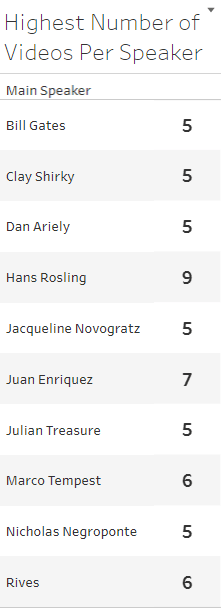

**There are 1459 different types of Occupations represented in TED talks.Quite an astronomical number to think about.**

In [18]:
unique_speaker <- unique(df_clean$speaker_occupation)

length(unique_speaker)

[1] 1459

# Month & Year of the Talks

Year 2009 was an important year for TED talks coinciding the rise of wide spread internet throughout the world.
* Also more awareness about TED would have led to increase in TED videos and associated interest in them.
* We can also see that the growth was sustained till 2016.
* However 2017 shows a sharp drop in the vidoes made could be due

 Rise of Popularity in Netflix and other streaming options
 Other Documentary applications and alternatives
 Rise of smart phone devices and ease of streaming of other associated video streaming apps.
 Reduction in interest in TED talks due to more popular and entertaining TV shows options
 

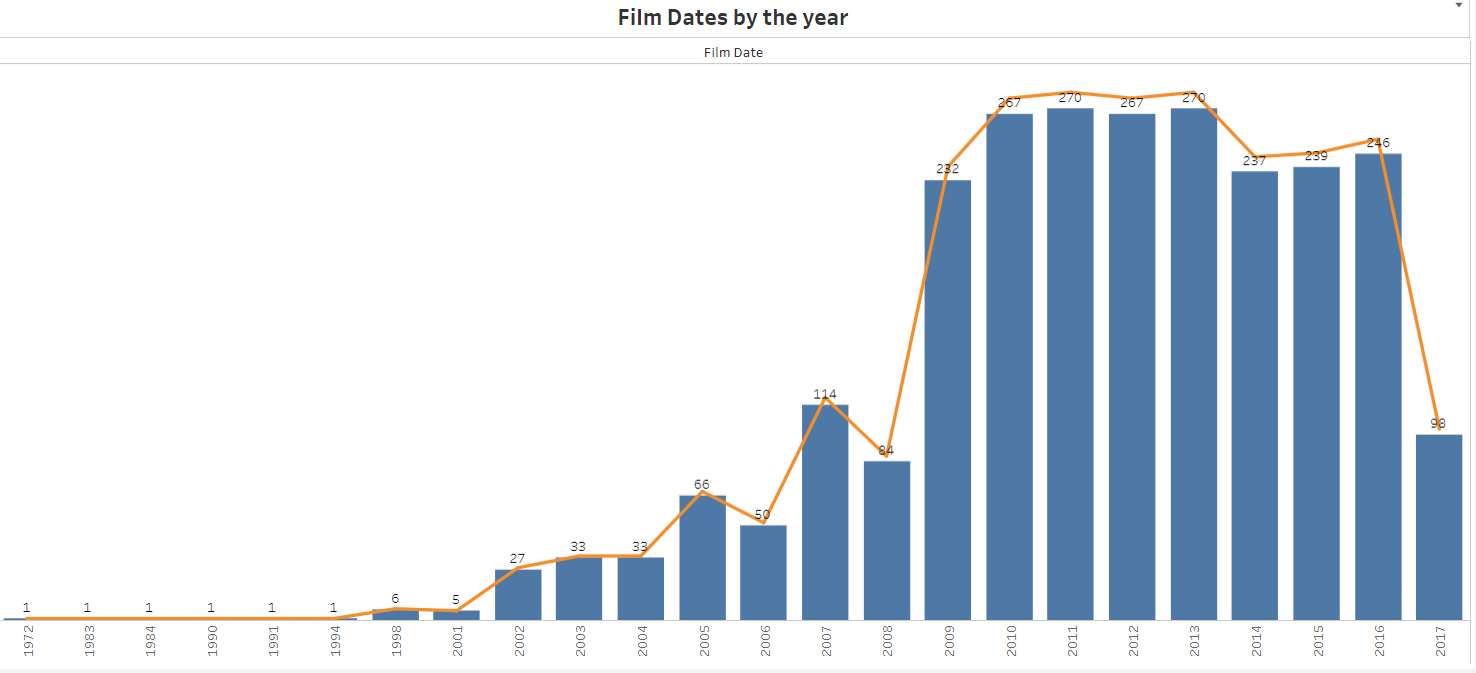

February is quite popular for film release date among TED talks. It is due to the fact that TED conference is held every year in February and most number of talks are showcased at that event.

August is lowest in number due to likely summer season and lesser interest among people to stay indoors and busy school season among children

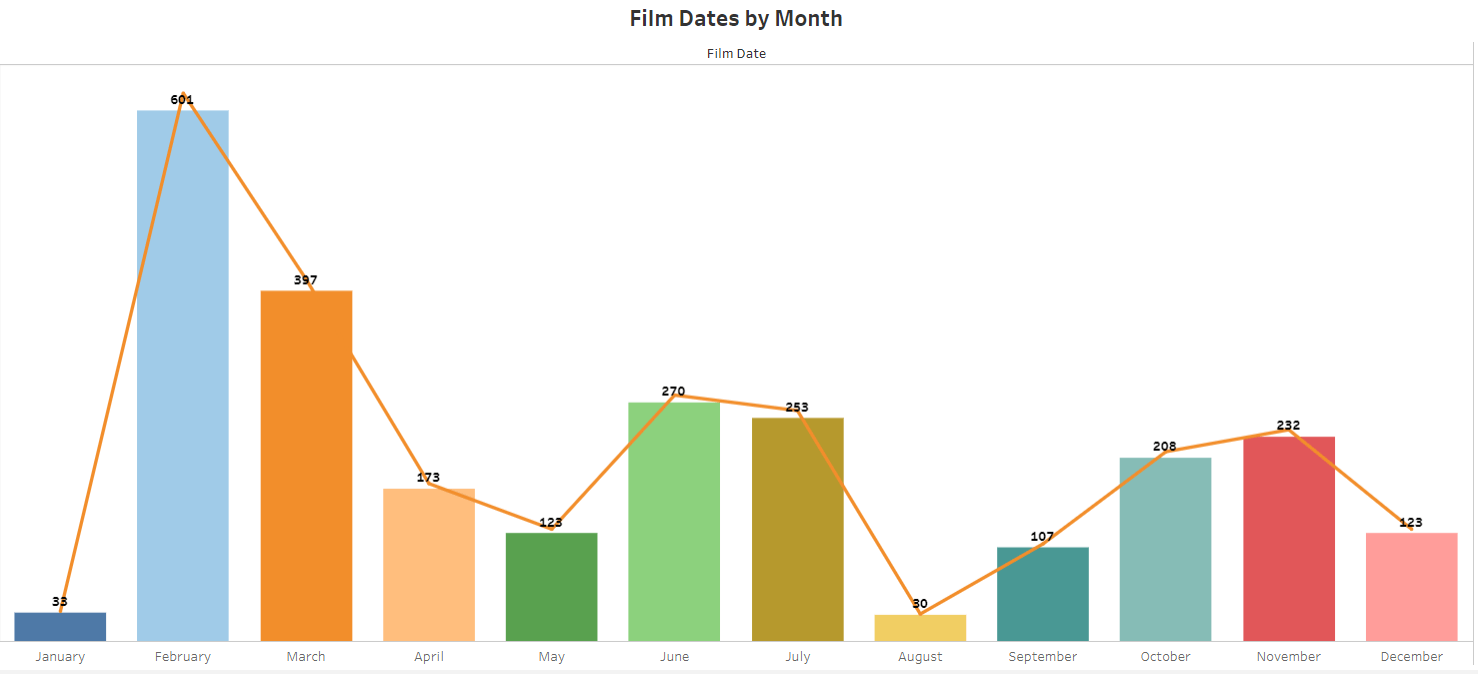

Thursday and Wedneday cumulatively have the highest release dates of the films/talks.
More research needs to be done on why those particular days are chosen for film dates. 

**It is likely that they believe over the weekend peopple will be more keen to watch the shows which are just released and could be on top of the 'New' or 'to watch list' in the algorithm of new releases in the home page**

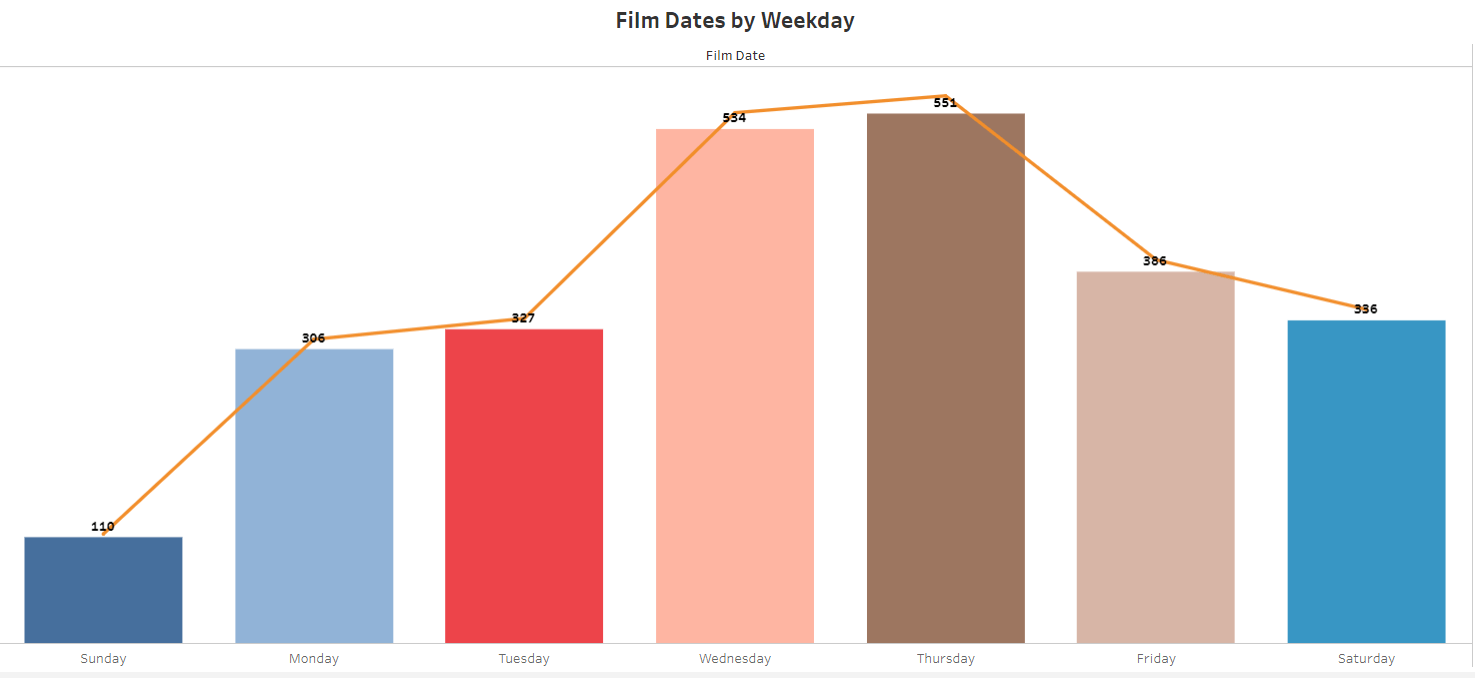

**Below heat map shows that early months of the year have the highest film dates release and greater interest among TED community and speakers to showcase their works and opinions**

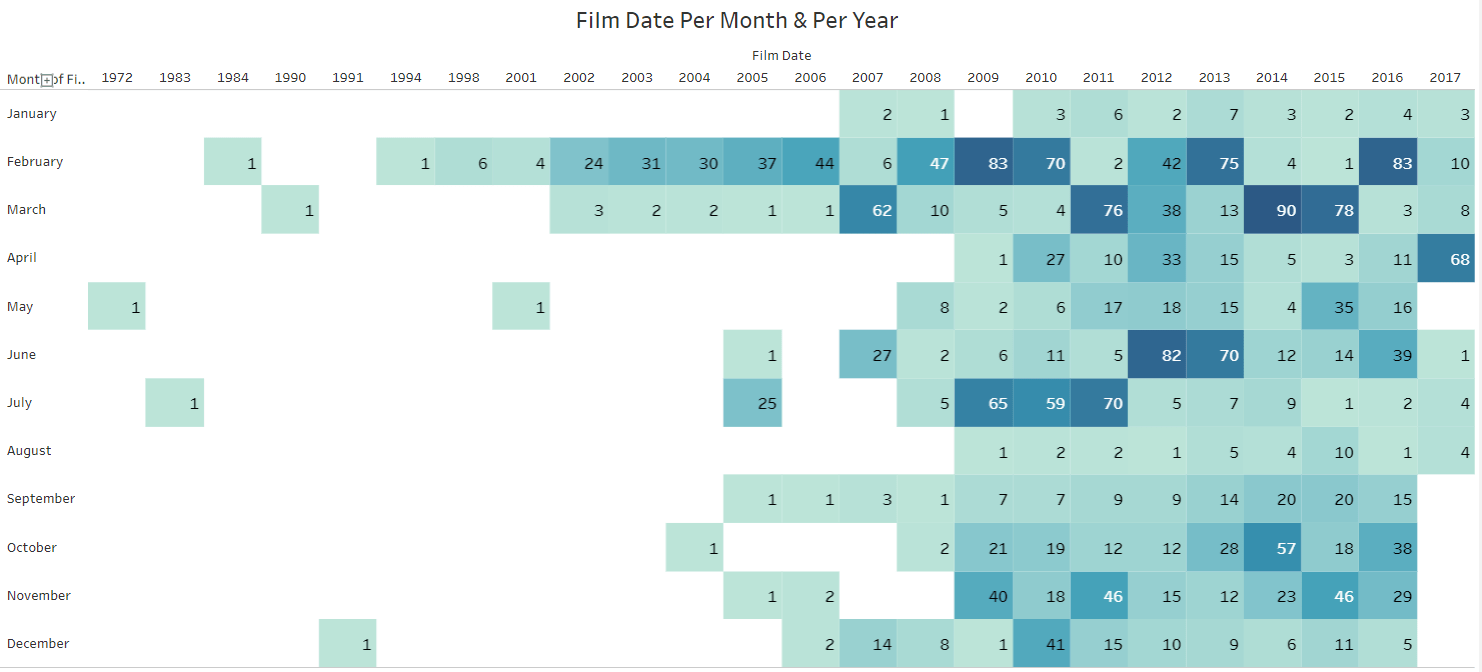

# Occupation of Speakers

**Writers and creative occupations have the highest number of videos in TED Talks.I believe that persons in creative field consider TED to be a great platform to express their ideas and works to vast number of people across the field**

**Also,triangulating occupations of the speakers is tricky since they consider themselves of having diverse occupations such as designer is also photographer, or writer and journalist consider themselves both or even more**

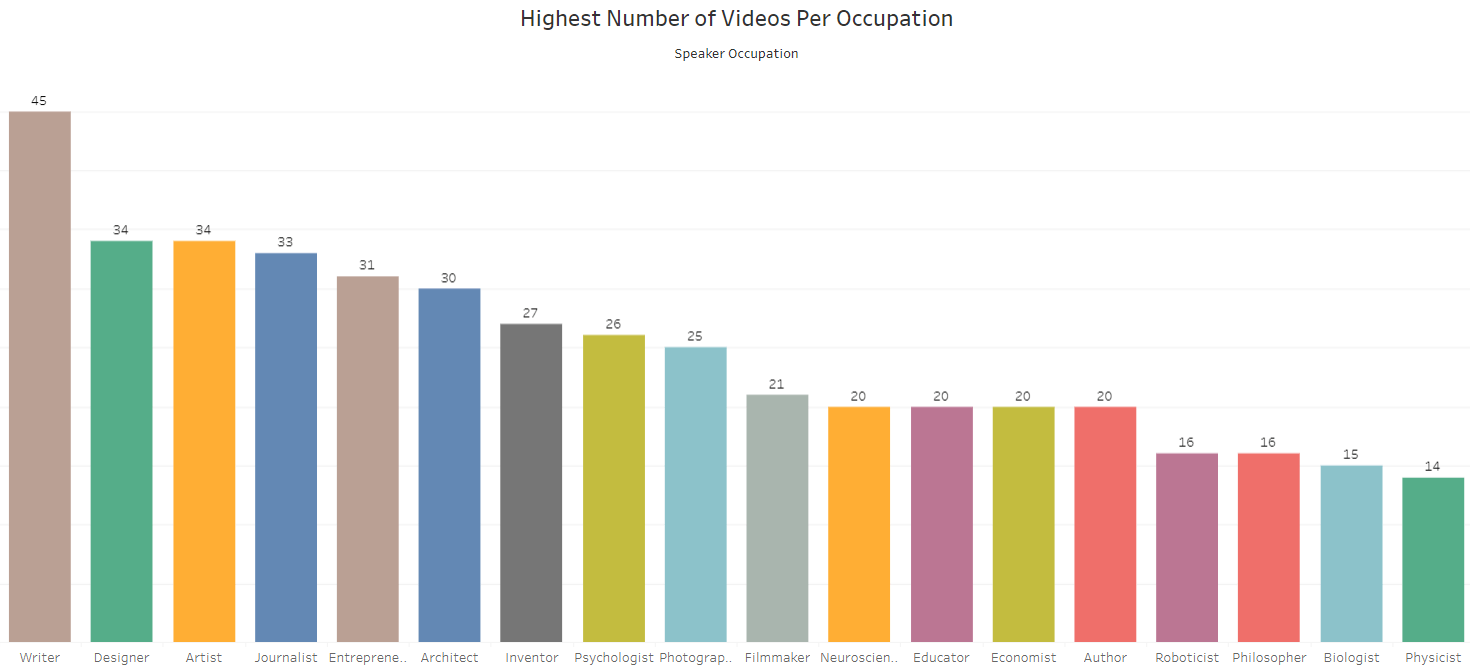

# Comments and Views based on  Occupations

In [19]:
speaker_count <- df_clean %>% select(c(speaker_occupation,views)) %>% group_by(speaker_occupation) %>% summarise(count=n())

head(speaker_count %>% arrange(desc(count)))


speaker_occupation,count
<chr>,<int>
Writer,45
Artist,34
Designer,34
Journalist,33
Entrepreneur,31
Architect,30


In [20]:
views_speaker <- df_clean %>% group_by(speaker_occupation)%>% summarise(views_speaker = sum(views)) %>% arrange(desc(views_speaker))


In [21]:
# we combine the two above data sets created for creation of box plot distribution


total_speakers <- inner_join(speaker_count,views_speaker)
colnames(total_speakers) <- c('Occupation','Count','Views')
total_speakers<-  total_speakers %>% arrange(desc(Views))

total_speakers <- total_speakers[1:6,]

head(total_speakers)

Joining, by = "speaker_occupation"


Occupation,Count,Views
<chr>,<int>,<int>
Writer,45,133549303
Psychologist,26,90851398
Author/educator,4,63006281
Entrepreneur,31,61764022
Social psychologist,8,56813602
Leadership expert,4,48203767


**Boxplot of Occupation of Speakers and Views point out that Writers and Psychologist have the highest median views and also more number of views compared to other professions**

**Similarly entreprenuers have high inequality in views as few have very high views in which the highest equals that of the writer**

In [ ]:
ggplot(total_speakers, aes(x=Occupation, y=Views, fill=Occupation)) + 
    geom_boxplot(alpha=0.3) +
    theme(legend.position="none")

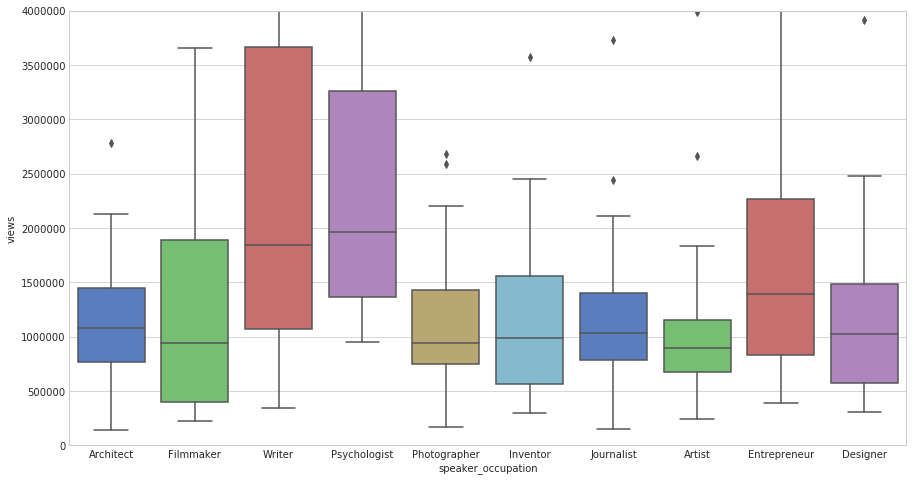

# Languages

**Following shows that there are 72 different languages in TED talks.It was quite high number and shows the diverse nature of languages and diversity being represented in this.**

In [80]:
summary(df_clean$languages)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   23.00   28.00   27.33   33.00   72.00 

**TED 2014 and TED 2009 conference garnered highest number of Films and Speakers compared to the others. Initial analysis also showed that 2009-20015 were the peak to gain the highest number of Speakers,films released at these conferences**

In [85]:
events <- table(df_clean$event)

events <- as.data.frame(events)

head(events %>% arrange(desc(Freq)))



,Var1,Freq
,<fct>,<int>
1,TED2014,84
2,TED2009,83
3,TED2013,77
4,TED2016,77
5,TED2015,75
6,TED2011,70
